LAB3


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [25]:
#подготовим данные
data = pd.read_csv('WineQT.csv')
data = data.drop(columns='Id')
X = data[data.columns[:-1]]
y = data['quality']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
#отмасштабируем данные
X_scaled = StandardScaler().fit_transform(X)

#названия столбцов
names = ['fixed acidity','volatile axidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)


In [52]:
clf = GridSearchCV(LogisticRegression(max_iter=2000), {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'],'solver':['liblinear']}, cv=2, verbose=0, scoring='accuracy')
clf.fit(X_train, y_train)
dual = False
print("Best Parametrs:", clf.best_params_)
print("Best Accuracy:", clf.best_score_)


Best Parametrs: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.5775


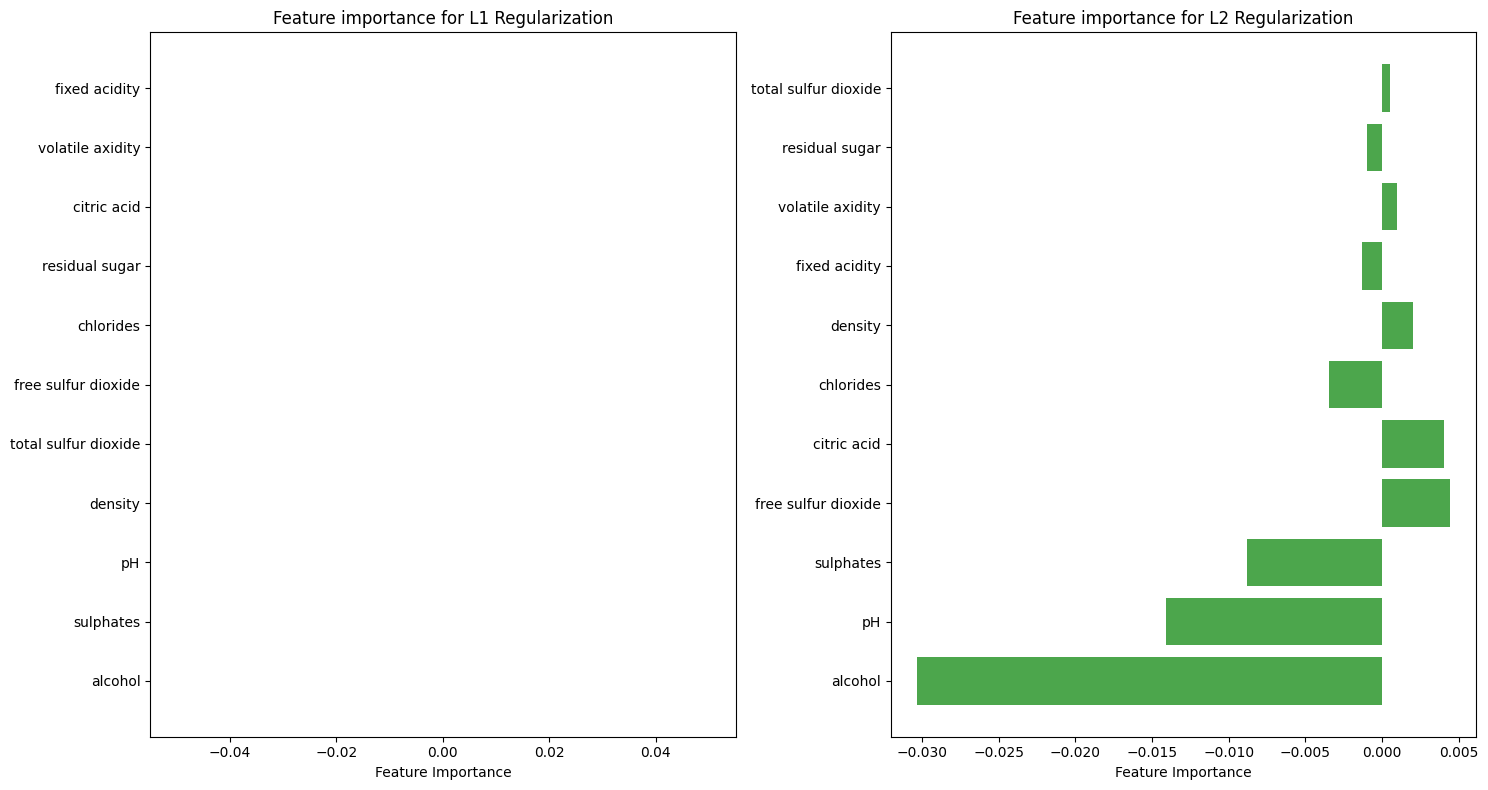

In [53]:
L1 = LogisticRegression(C=clf.best_params_['C'], penalty='l1', solver='liblinear')
L2 = LogisticRegression(C=clf.best_params_['C'], penalty='l2', solver='liblinear')
L1.fit(X_train,y_train)
L2.fit(X_train,y_train)
plt.figure(figsize=(15, 8))

#график для L1 Regularization
plt.subplot(1, 2, 1)
indices_l1 = np.argsort(np.abs(L1.coef_[0]))[::-1]
plt.barh(range(len(indices_l1)), L1.coef_[0][indices_l1], color='g')
plt.yticks(range(len(indices_l1)), [names[i] for i in indices_l1])
plt.xlabel('Feature Importance')
plt.title('Feature importance for L1 Regularization')

#график для L2 Regularization
plt.subplot(1, 2, 2)
indices_l2 = np.argsort(np.abs(L2.coef_[0]))[::-1]
plt.barh(range(len(indices_l2)), L2.coef_[0][indices_l2], color='g', alpha=0.7)
plt.yticks(range(len(indices_l2)), [names[i] for i in indices_l2])
plt.xlabel('Feature Importance')
plt.title('Feature importance for L2 Regularization')

plt.tight_layout()
plt.show()